In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

In [2]:
df = pd.read_csv('possum.csv', index_col='case')
df.describe()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [3]:
df.drop(columns=['site', 'Pop'], inplace=True)

In [4]:
df.isna().sum()

sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
one_hot = pd.get_dummies(df['sex'])

In [7]:
df = pd.concat([df, one_hot], axis=1)
df.drop(columns=['sex'], inplace=True)
df

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,f,m
case,,,,,,,,,,,,
1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,False,True
2,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,True,False
3,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,True,False
4,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,True,False
5,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
100,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,False,True
101,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,False,True
102,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,True,False


np.float64(3.7288135593220337)

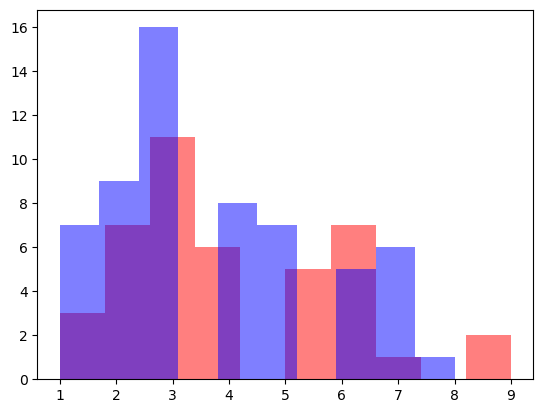

In [8]:
import matplotlib.pyplot as plt

f_age = df.loc[(df.f==True)]['age']
m_age = df.loc[(df.m==True)]['age']

plt.hist(f_age, color='red', alpha=0.5)
plt.hist(m_age, color='blue', alpha=0.5)

m_age.mean()

In [9]:
df.drop(columns=['f', 'm'], inplace=True)
X = df.drop(columns='age').values
y = df.age.values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=44, test_size=0.2)

In [22]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([4.4, 4. , 3.2, 5.8, 4. , 4. , 4.6, 2.4, 4.6, 3.8, 2. , 5. , 3. ,
       5.2, 5.8, 5. , 2.2, 2.8, 4.8, 1.6, 3. ])

Итак, мы научились объявлять модель, обучать ее и получать предсказания на тестовые элементы. Давайте теперь подумаем, как оценивать то, насколько хороша наша модель. Роль оценки моделей на себя берут метрики. Это функции, которые принимают на вход правильные ответы на тестовые данные и ответы модели, и выдают число — меру "хорошести" предсказаний модели. Для каждой задачи сущесвуют свои метрики. В данном семинаре мы рассмотрим лишь несколько метрик для задачи регрессии. Более подробный обзор метрик для задач регрессии и классификации можно найти в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).


Для нашей задачи мы будем использовать метрику MSE

**MSE** (Mean Squared Error, или, по русски, среднеквадратичная ошибка) — одна из самых популярных метрик в задаче регрессии. MSE считается по следующей формуле:

$$MSE(y_{true}, y_{pred}) = \frac{1}{N}\sum_{i=1}^{n} (y^{true}_i - y^{pred}_i)^2$$

Иногда для того, чтобы значение метрики MSE имело масштаб значений целевой переменной, из него извлекают квадратный корень. Это называют метрикой RMSE (Root Mean Squared Error):

$$RMSE(y_{true}, y_{pred}) = \sqrt{\frac{1}{N}\sum_{i=1}^{n} (y^{true}_i - y^{pred}_i)^2}$$

MSE не ограничен сверху. По значению MSE может быть нелегко понять, насколько оно «хороше» или «плохое». Для ориентира часто берут наилучшее константное предсказание с точки зрения MSE — среднее арифметическое значений целевой переменной обучающей части данных. Далее можно посчитать метрику $R^2$:

$$R^2(y_{true}, y_{pred}) = 1 - \frac{\sum_{i=1}^{n} (y^{true}_i - y^{pred}_i)^2}{\sum_{i=1}^{n} (y^{true}_i - y^{true}_{mean})^2}$$

Верхняя граница $R^2$ — 1. Чем значение $R^2$, тем лучше обучилась модель.

Так как в MSE ошибка на каждом элементе возводится в квадрат, MSE сильно штрафует за большие ошибки на элементах. И если в наших тестовых данных присутствуют выбросы, то ошибки на этих выбросах будут вносить существенный вклад в MSE, и, чтобы уменьшить метрику, модель будет стараться уменьшать ошибки именно на этих на объектах-выбросах, а не на остальных элементах. Поэтому MSE может быть не лучшей метрикой для сравнения моделей на выборках с большим количеством выбросов. В таких случаях прибегают к метрике MAE (Mean Absolute Error):

$$MAE(y_{true}, y_{pred}) = \frac{1}{N}\sum_{i=1}^{n} |y^{true}_i - y^{pred}_i|$$

Существуют и другие метрики для задачи регрессии. Каждая метрика используется под определенные случаи. Какие метрики есть в sklearn, можно посмотреть [здесь](https://scikit-learn.org/stable/modules/model_evaluation.html).

В наших данных нет сильных выбросов, поэтому вполне можно использовать MSE в качестве метрики. Но для наглядности мы рассмотрим все упомянутые выше метрики.


In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, f1_score

In [26]:
r2_score(y_test, y_pred)

0.30630849220103984

In [32]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scores = cross_validate(DecisionTreeRegressor(random_state=44), X, y, cv=5, scoring={'r2': make_scorer(r2_score), 'mean_squared_error': make_scorer(mean_squared_error)}, return_train_score=True)

scores.items()

dict_items([('fit_time', array([0.00095105, 0.00088787, 0.00103188, 0.00130868, 0.00095844])), ('score_time', array([0.00110674, 0.00083685, 0.00077844, 0.00112081, 0.00078845])), ('test_r2', array([-0.57100592, -1.05443371, -0.97983501, -0.49584488, -0.72131148])), ('train_r2', array([1., 1., 1., 1., 1.])), ('test_mean_squared_error', array([8.42857143, 5.85      , 5.4       , 5.4       , 4.2       ])), ('train_mean_squared_error', array([0., 0., 0., 0., 0.]))])

In [ ]:
model.get_params()    ## удобно выводить параметры

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [36]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeRegressor()
param_grid = {
    'max_depth': np.arange(1, 5),
    'min_samples_leaf': [1, 2, 3]
}

gridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(r2_score))

gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)

{'max_depth': np.int64(1), 'min_samples_leaf': 1}


#### Сохранение модели

In [39]:
import pickle

In [40]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))